<a href="https://colab.research.google.com/github/dyhwang7/CS4650/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade pandas

In [2]:
!pip install --upgrade pandas-datareader

In [3]:
!pip install yfinance

# WEEK 1: Data Set Up

Select companies that I am personally interested in that have large market share of their respective industries and have stable data to train my model. While I am interested, for the purposes of this study, I excluded companies that experienced abnormal volatility like TSLA, AMC, GME, because they are outliers and would not be a good train data set for the models. From research, it appears like LSTM is often recommended for predicting stock prices so I studied up on that and plan on building that to compare. 

In [13]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
tickers = ['AAPL', 'FB', 'MSFT','V', 'DIS', 'NVDA']
data = []
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 11, 30)

for t in tickers:
  data.append(web.DataReader(t, 'yahoo', start, end))

for i in data:
  print(i)

                  High         Low  ...       Volume   Adj Close
Date                                ...                         
2018-01-02   43.075001   42.314999  ...  102223600.0   41.188164
2018-01-03   43.637501   42.990002  ...  118071600.0   41.180981
2018-01-04   43.367500   43.020000  ...   89738400.0   41.372272
2018-01-05   43.842499   43.262501  ...   94640000.0   41.843307
2018-01-08   43.902500   43.482498  ...   82271200.0   41.687897
...                ...         ...  ...          ...         ...
2021-11-23  161.800003  159.059998  ...   96041900.0  161.410004
2021-11-24  162.139999  159.639999  ...   69463600.0  161.940002
2021-11-26  160.449997  156.360001  ...   76959800.0  156.809998
2021-11-29  161.190002  158.789993  ...   88748200.0  160.240005
2021-11-30  165.520004  159.919998  ...  174048100.0  165.300003

[986 rows x 6 columns]
                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2018-01

I will be using Adj Close as the standard for the daily stock price. Close seems like a better option than Open because Open does not include what happens on that given that obviously, and Adj Close accounts for corporate activity, etc so that it is a more accurate representation of the stock's value.  

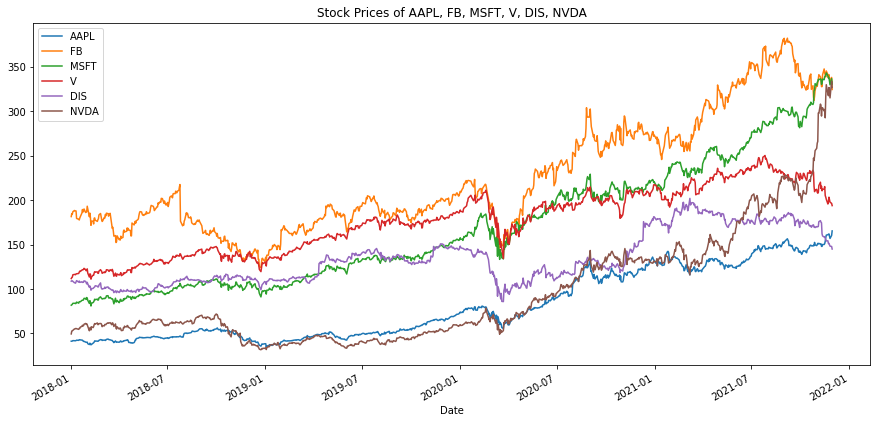

In [7]:
for index, val in enumerate(data):
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
plt.title('Stock Prices of ' + ', '.join(tickers))
plt.legend()

# WEEK 2: Basic Stock and Metrics Analysis 

As I am unfamiliar with the basics of stocks, I studied up on various ways of visualizing stocks and metrics that indcate the trends and values of stocks. 

First I start off by plotting the volume of each stock to observe the overall interest and activity of each stock. Here it appears like over the past 3 years, AAPL's volume trumps all the rest with NVDA at second and FB and MSFT fighting for third

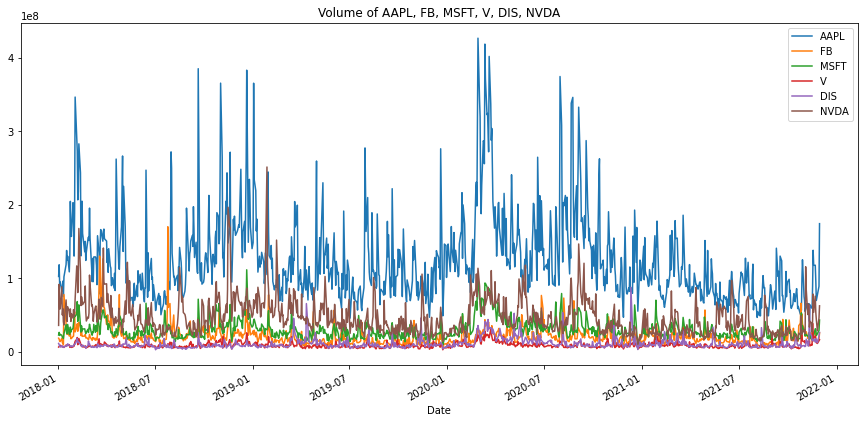

In [8]:
for index, val in enumerate(data):
  val['Volume'].plot(label=tickers[index], figsize=(15,7))
plt.title('Volume of ' + ', '.join(tickers))
plt.legend()

### Next, we plot a 6 x 6  scatter matrix of the 6 companies to observe the correlation between the stocks. As expected, tech companies like AAPL, FB, NVDA, and MSFT all seem very positively correlated with each combination forming a straight line. V and DIS do not exhibit a strong correlation with the rest, and DIS especially seems to lack correlation with the rest of the stocks. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb2c727a50>,
      dtype=object)

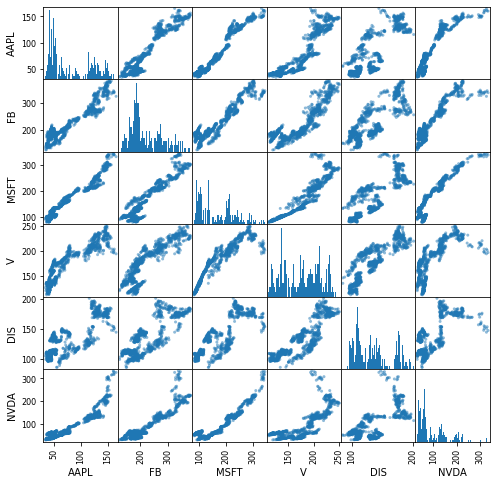

In [9]:
scatter_data = pd.concat([val['Adj Close'] for val in data],axis = 1)
scatter_data.columns = tickers

scatter_matrix(scatter_data, figsize = (8,8), hist_kwds= {'bins':250})

Next we observe the percentage increase in each stock's value throughout the past 3 years. This value is achieved by comparing a given day's price with the previous day's and creating a histogram of the percent difference data. Here Facebook seems to have the highest volatility, an its x range seems to be largest, and AAPL and NVDA appear to be the best performing when looking at positive side vs the negative side

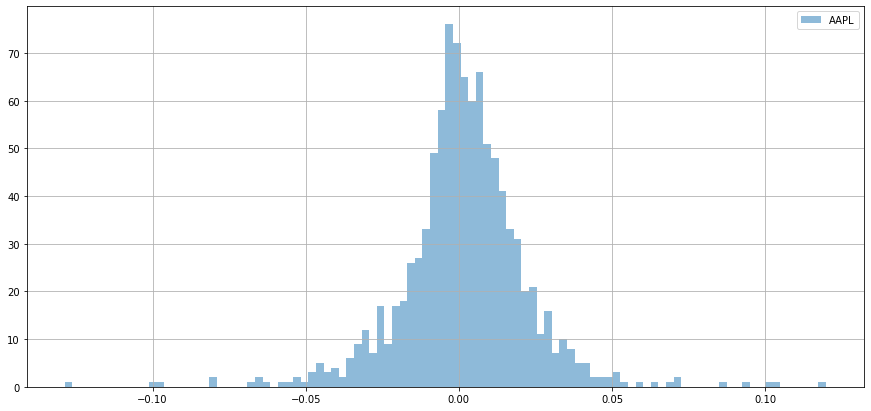

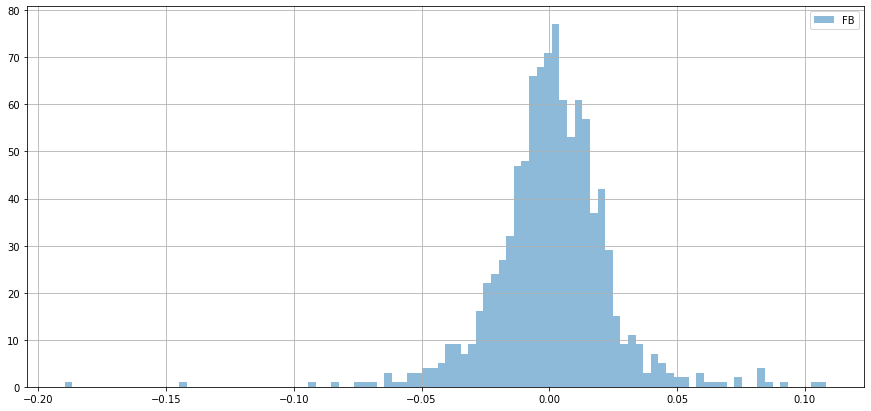

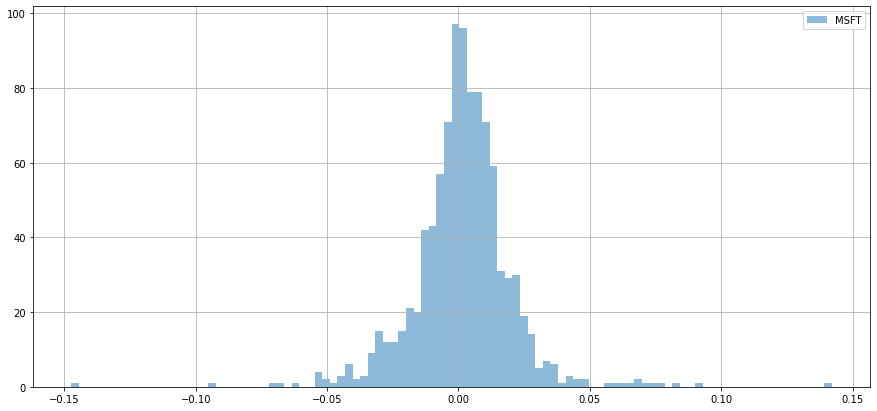

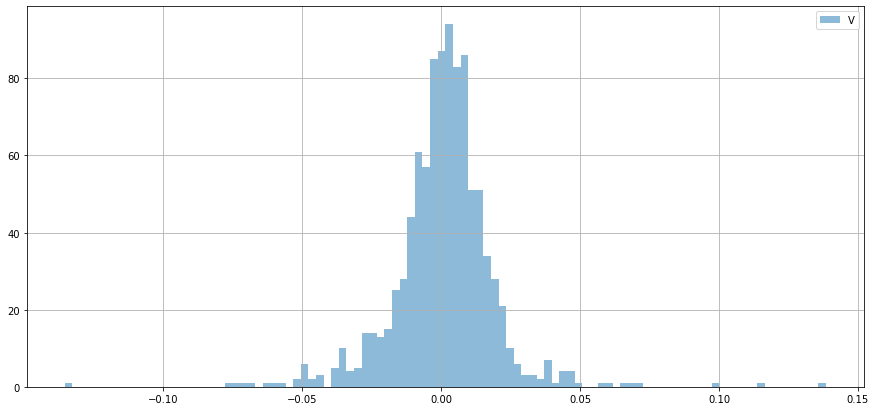

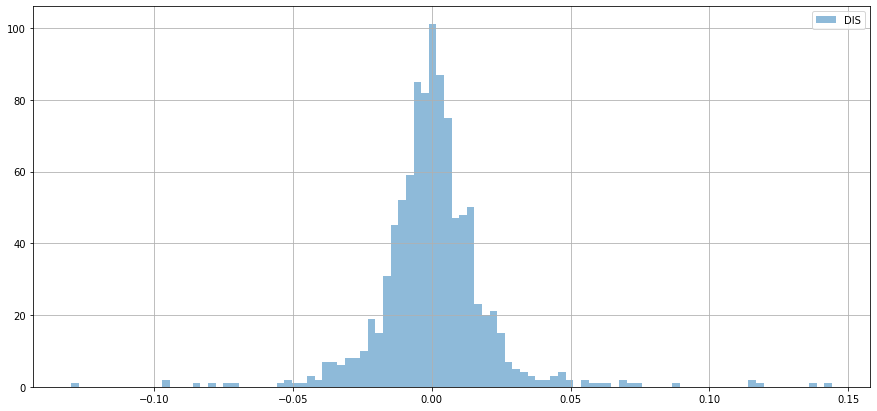

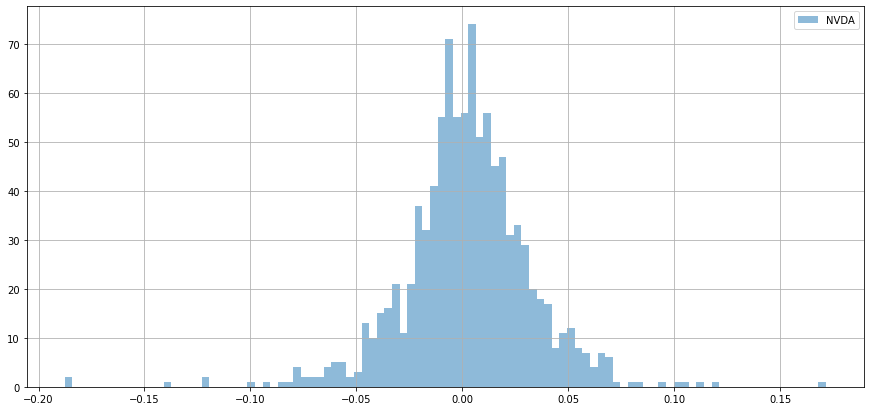

In [10]:
for index, val in enumerate(data):
  returns = (val['Adj Close']/val['Adj Close'].shift(1))-1
  returns.hist(bins = 100, label = tickers[index], alpha = 0.5, figsize = (15,7))
  plt.legend()
  plt.show()

Next we calculate the moving average data for each of the stocks and plot it over the 3 year window to observe trends. Rather than looking at each individual day's stock price, the moving average smoothes the line out by taking a look at the average of previous x number of days for the given day. The blue daily data fluctuates much more than the orange 50 moving average data, and the green 100 moving average data is much more stable than the rest. These provide us with an easy snapshot of the trend of the stock. 

Few interesting observations: When looking at the green data, they mostly rise over the past couple years due to the stock boom that resulted from COVID. Orange lines all trend up as well except for the noticeable dip around 03/2020 when COVID first broke in the US. While most recovered quickly, DIS expectedly took the hardest fall and took the longest to recover

As of recent, FB, V, and DIS seem to trend downward, while AAPL and MSFT are showing a strong positive trend with NVDA trending upward exponentially.

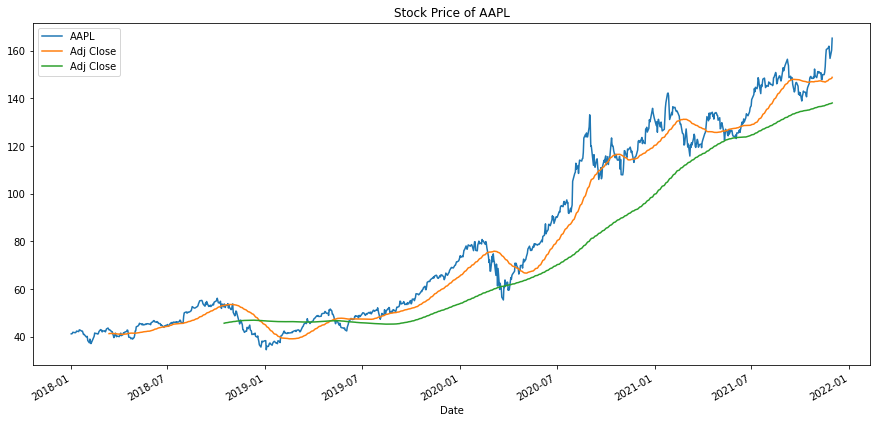

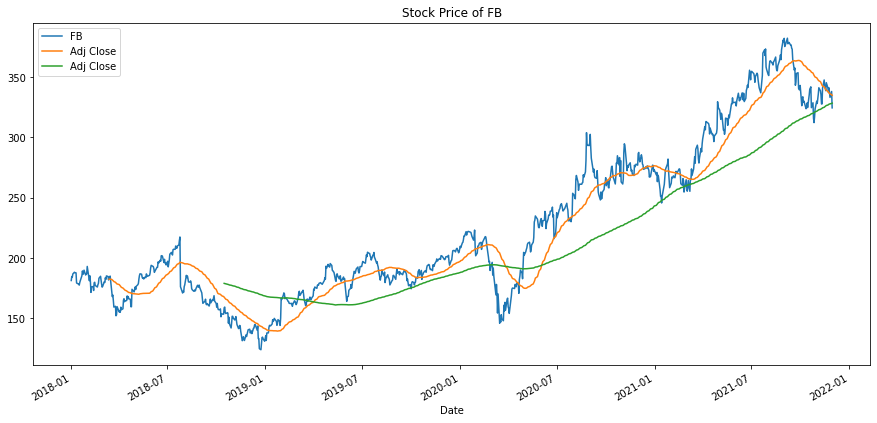

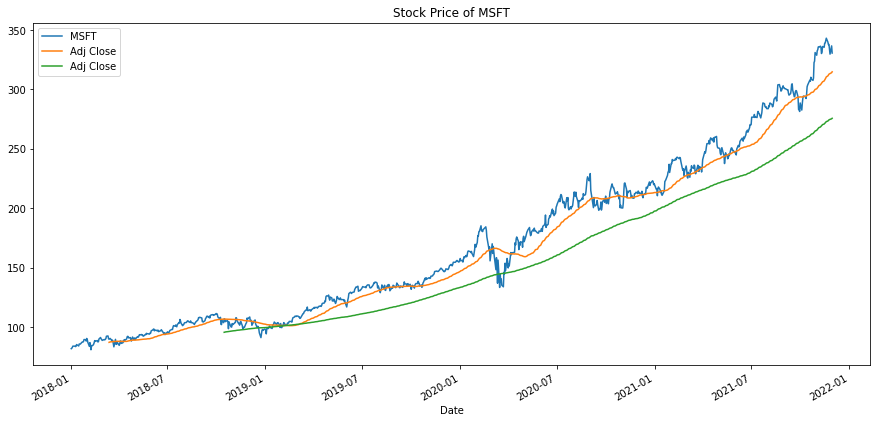

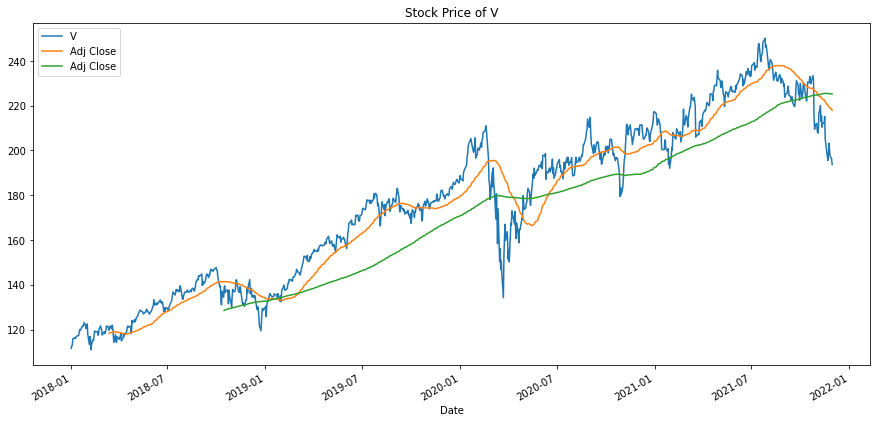

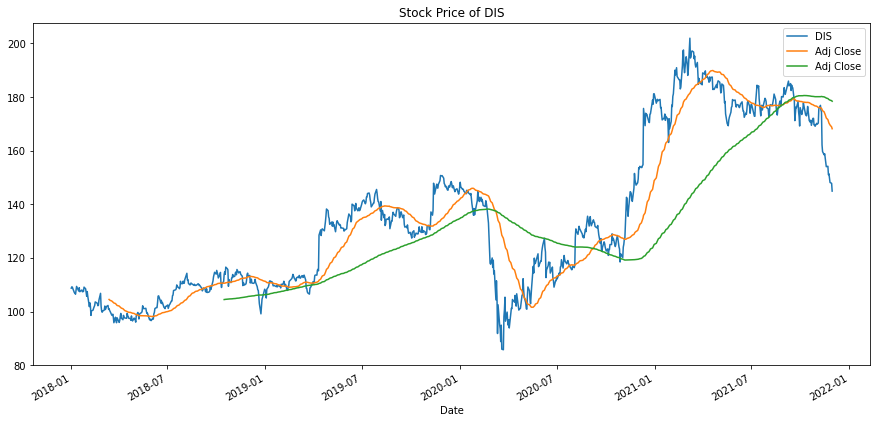

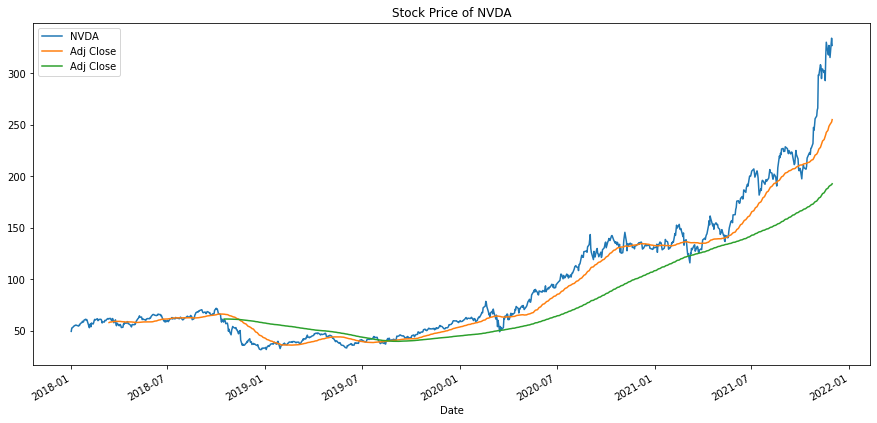

In [11]:
for index, val in enumerate(data):
  rolling_50 = val['Adj Close'].rolling(50).mean()
  rolling_200 = val['Adj Close'].rolling(200).mean()
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
  rolling_50.plot()
  rolling_200.plot()
  plt.title('Stock Price of ' + tickers[index])
  plt.legend()
  plt.show()

160.3298 5.61
304.88 13.974
318.92 8.939
195.6 5.627
145.035 1.094
304.23 3.243


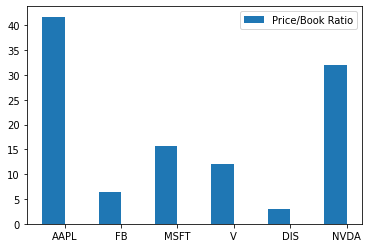

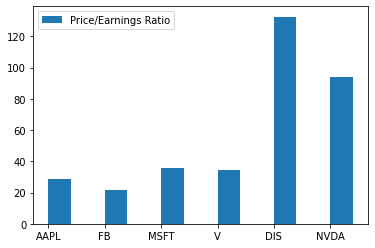

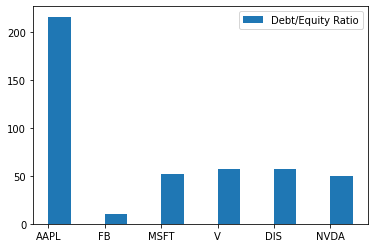

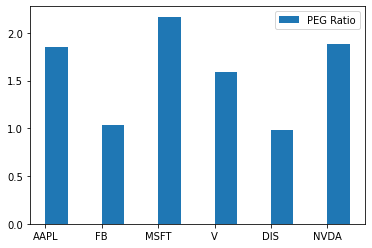

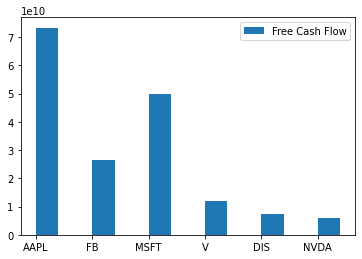

zip
sector
fullTimeEmployees
longBusinessSummary
city
phone
state
country
companyOfficers
website
maxAge
address1
industry
ebitdaMargins
profitMargins
grossMargins
operatingCashflow
revenueGrowth
operatingMargins
ebitda
targetLowPrice
recommendationKey
grossProfits
freeCashflow
targetMedianPrice
currentPrice
earningsGrowth
currentRatio
returnOnAssets
numberOfAnalystOpinions
targetMeanPrice
debtToEquity
returnOnEquity
targetHighPrice
totalCash
totalDebt
totalRevenue
totalCashPerShare
financialCurrency
revenuePerShare
quickRatio
recommendationMean
exchange
shortName
longName
exchangeTimezoneName
exchangeTimezoneShortName
isEsgPopulated
gmtOffSetMilliseconds
quoteType
symbol
messageBoardId
market
annualHoldingsTurnover
enterpriseToRevenue
beta3Year
enterpriseToEbitda
52WeekChange
morningStarRiskRating
forwardEps
revenueQuarterlyGrowth
sharesOutstanding
fundInceptionDate
annualReportExpenseRatio
totalAssets
bookValue
sharesShort
sharesPercentSharesOut
fundFamily
lastFiscalYearEnd
heldPerce

In [12]:
metric_data = []
for t in tickers:
  metric_data.append(yf.Ticker(t))

PB = []
PE = []
DE = []
PEG = []
FCF = []

for i in metric_data:
  PB.append(i.info['priceToBook'])
  print(i.info['regularMarketPrice'], i.info['trailingEps'])
  PE.append(i.info['regularMarketPrice']/i.info['trailingEps'])
  DE.append(i.info['debtToEquity'])
  PEG.append(i.info['pegRatio'])
  FCF.append(i.info['freeCashflow'])

X_axis = np.arange(len(tickers))

plt.bar(X_axis - 0.2, PB, 0.4, label = 'Price/Book Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, PE, 0.4, label = 'Price/Earnings Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, DE, 0.4, label = 'Debt/Equity Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, PEG, 0.4, label = 'PEG Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, FCF, 0.4, label = 'Free Cash Flow')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()

for i in metric_data[0].info.keys():
  print(i)

Based on the analysis performed above, AAPL, MSFT, and NVDA seem like they present the 3 best financial metrics, are trending upward, have strong correlation to each other, as a result I will purchase stocks of each for week 2. 

# WEEK 3: Long Short-Term Memory Model

I created a long short-term memory(LSTM) model and ran it for each of the tickers. The data is split approximately 60:40 for training/testing with a 45 day sliding window used to calculate the values for each day. I have tested several values for the number of units per each LSTM layer, the dropout rate used for each dropout layer, along with the number of epochs and the batch sizes. The values predicted are for the next 3 days with each additional predicted value appended to the data to be used for the following day.

This current iteration where prediction_days = 45, # units = 50, dropout rate = 0.15, # epochs = 50, batch size = 16 seems to perform well for AAPL, V, DIS with the RMSE values ranging from 5 - 8 with their corresponding R^2 values at 0.83 to 0.90+. However, for the rest of the stocks, it didn't seem to perform very well with the given set up. I plan on adjusting the respective hyper parameters in the following week to create a better fitting model. 
The 3 tickers that are recommended are also the only 3 that have a net positive change in today's stock value, so perhaps the model is too sensitive to the last few days that it is causing the spike. I will explore how to address this issue as well. 

While the spike does seem unusual, for this week I will go with what is recommended by the model and purchase the 3 highest recommendations in FB, V, DIS 

In [41]:
def stock_prediction(index, data):
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1,1))

  prediction_days = 45
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50, return_sequences=True))
  model.add(Dropout(0.15))
  model.add(LSTM(units=50))
  model.add(Dropout(0.15))
  model.add(Dense(units=1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, epochs=50, batch_size=16)
  test_start = dt.datetime(2020, 1, 1)
  test_end = dt.datetime(2021, 11, 30)

  test_data = web.DataReader(tickers[index], 'yahoo', test_start, test_end)
  actual_prices = test_data['Adj Close'].values

  total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)
  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  model_inputs = model_inputs.reshape(-1, 1)
  model_inputs = scaler.transform(model_inputs)

  x_test = []

  for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])


  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  print('shape ', x_test.shape)

  predicted_prices = model.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)

  forecast_input = test_data['Adj Close'].values.reshape(-1, 1)
  forecast_input = scaler.transform(forecast_input[-prediction_days:])

  for _ in range(3):
    x = forecast_input[-prediction_days:]
    x = x.reshape((1, prediction_days, 1))
    forecast_output = scaler.inverse_transform(model.predict(x))[0][0]
    forecast_input = np.append(forecast_input, forecast_output)
  forecast = forecast_input[prediction_days:]
  forecast = forecast.reshape(-1,1)
  print()
  p = []
  new_predict = []
  for i in predicted_prices:
    p.append(i[0])

  for i in predicted_prices:
    new_predict.append(float(i))

  for j in forecast:
    new_predict.append(float(j))
  rms = mean_squared_error(actual_prices, p, squared=False)
  print(rms)
  r2 = r2_score(actual_prices, p)
  print(r2)
  

  print(new_predict[-1])
  company = tickers[index]
  plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
  plt.plot(predicted_prices, color="orange", label=f"Predicted {company} Price")
  plt.title(f"{company} Share Price")
  plt.xlabel('Time')
  plt.ylabel(f'{company} Share Price')
  plt.legend()
  plt.show()
  return rms, r2, new_predict





  
  # print(actual_prices[-60:])
  # x_input = test_data['Adj Close']
  # x_input = x_input[-60:].values.reshape(-1, 1)
  # x_input = scaler.transform(x_input)
  # print(x_input)
  # print('shape2',x_input.shape)
  # x_input = np.array(x_input)
  # x_input = np.reshape(x_input, (1, 60, 1))
  # yhat = scaler.inverse_transform(model.predict(x_input))
  # print()
  # print(yhat)
  # print(predicted_prices[-1:])
  # real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
  # real_data = np.array(real_data)
  # real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

  # print(real_data, len(real_data))

  # prediction = model.predict(real_data)
  # prediction = scaler.inverse_transform(prediction)
  # print(f"Prediction: {prediction}")

Epoch 1/50
29/29 [==============================] - 7s 58ms/step - loss: 0.0454
Epoch 2/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0077
Epoch 3/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0059
Epoch 4/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0050
Epoch 5/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0040
Epoch 6/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0046
Epoch 7/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0038
Epoch 8/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0037
Epoch 9/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0041
Epoch 10/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0035
Epoch 11/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0038
Epoch 12/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 13/50
29/29 [==================

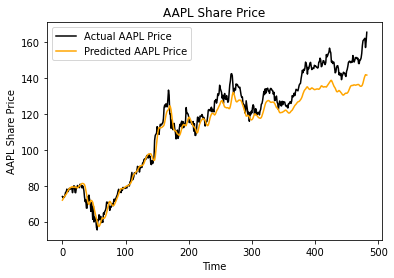

Epoch 1/50
29/29 [==============================] - 7s 60ms/step - loss: 0.0554
Epoch 2/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0149
Epoch 3/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0122
Epoch 4/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0128
Epoch 5/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0125
Epoch 6/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0123
Epoch 7/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0105
Epoch 8/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0092
Epoch 9/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0091
Epoch 10/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0088
Epoch 11/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0096
Epoch 12/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0090
Epoch 13/50
29/29 [==================

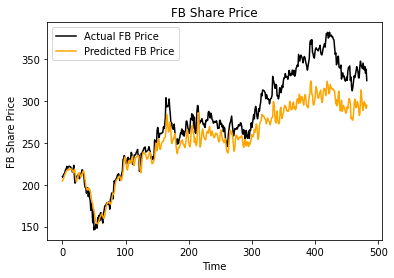

Epoch 1/50
29/29 [==============================] - 7s 61ms/step - loss: 0.0389
Epoch 2/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0050
Epoch 3/50
29/29 [==============================] - 2s 58ms/step - loss: 0.0042
Epoch 4/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0042
Epoch 5/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0037
Epoch 6/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0042
Epoch 7/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0043
Epoch 8/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0037
Epoch 9/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0036
Epoch 10/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0037
Epoch 11/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0033
Epoch 12/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0034
Epoch 13/50
29/29 [==================

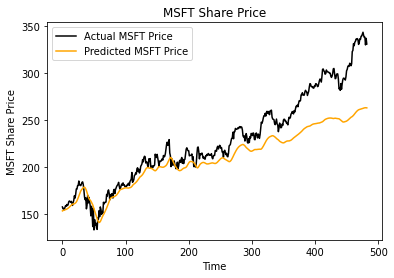

Epoch 1/50
29/29 [==============================] - 8s 61ms/step - loss: 0.0569
Epoch 2/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0075
Epoch 3/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0048
Epoch 4/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0059
Epoch 5/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0053
Epoch 6/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0050
Epoch 7/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0049
Epoch 8/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0048
Epoch 9/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0053
Epoch 10/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0063
Epoch 11/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0042
Epoch 12/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0049
Epoch 13/50
29/29 [==================

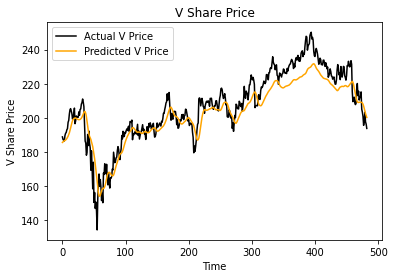

Epoch 1/50
29/29 [==============================] - 7s 61ms/step - loss: 0.0484
Epoch 2/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0101
Epoch 3/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0092
Epoch 4/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0091
Epoch 5/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0068
Epoch 6/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0080
Epoch 7/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0073
Epoch 8/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0070
Epoch 9/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0063
Epoch 10/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0058
Epoch 11/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0049
Epoch 12/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0058
Epoch 13/50
29/29 [==================

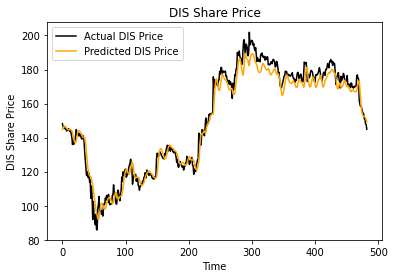

Epoch 1/50
29/29 [==============================] - 7s 60ms/step - loss: 0.0504
Epoch 2/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0130
Epoch 3/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0115
Epoch 4/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0100
Epoch 5/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0087
Epoch 6/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0093
Epoch 7/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0090
Epoch 8/50
29/29 [==============================] - 2s 63ms/step - loss: 0.0081
Epoch 9/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0077
Epoch 10/50
29/29 [==============================] - 2s 62ms/step - loss: 0.0071
Epoch 11/50
29/29 [==============================] - 2s 61ms/step - loss: 0.0075
Epoch 12/50
29/29 [==============================] - 2s 60ms/step - loss: 0.0073
Epoch 13/50
29/29 [==================

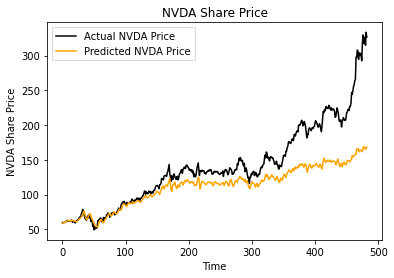

RMSE:7.74214090665822	R2:0.9220106281587284	last actual:139.86880493164062	weekly prediction: 158.97340393066406	projected profit/stock: 19.104598999023438
RMSE:28.382620759378547	R2:0.7504838167370964	last actual:299.1788024902344	weekly prediction: 526.343017578125	projected profit/stock: 227.16421508789062
RMSE:27.883696432513105	R2:0.6752120224665347	last actual:262.785888671875	weekly prediction: 272.216796875	projected profit/stock: 9.430908203125
RMSE:8.48992442783138	R2:0.8333615718345784	last actual:205.3618621826172	weekly prediction: 234.01559448242188	projected profit/stock: 28.653732299804688
RMSE:5.296173811923439	R2:0.9689011541022343	last actual:152.4600067138672	weekly prediction: 280.2581481933594	projected profit/stock: 127.79814147949219
RMSE:43.789344509611524	R2:0.46070940545226224	last actual:167.21697998046875	weekly prediction: 181.1950225830078	projected profit/stock: 13.978042602539062


In [42]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2020, 1, 1)

train_data = []

lstm_result = []

for t in tickers:
  train_data.append(web.DataReader(t, 'yahoo', start, end))
for index, val in enumerate(train_data):
  r1, r2, f = stock_prediction(index, val)
  lstm_result.append([r1, r2, f])

for i in lstm_result:
  print('RMSE:{}\tR2:{}\tlast actual:{}\tweekly prediction: {}\tprojected profit/stock: {}'.format(i[0], i[1], i[2][-8], i[2][-1], i[2][-1]-i[2][-8]))